<a href="https://colab.research.google.com/github/WQchoi/myRepoTest/blob/main/FM_%EC%A3%BC%EA%B8%89%EA%B3%BC_%EB%8A%A5%EB%A0%A5%EC%B9%98%EC%9D%98_%EA%B4%80%EA%B3%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filePath = '/content/drive/MyDrive/구글클라우드인공지능개발자과정1기/FM_2023.csv'
df = pd.read_csv(filePath, index_col='UID')

In [ ]:
# 포지션별로 데이터셋 분리

att_df = df[df['Position'].str.contains('S')]
mid_df = df[df['Position'].str.contains('M')]
def_df = df[df['Position'].str.contains('D')]
gk_df = df[df['Position'].str.contains('GK')]

In [ ]:
# 1. 포지션별로 높은 능력치를 파악하기위하여,
# 포지션별로 분리된 자료에서 능력치만 추출한 데이터프레임 생성

att_stat = att_df.iloc[:, 7:44]
mid_stat = mid_df.iloc[:, 7:44]
def_stat = def_df.iloc[:, 7:44]
gk_stat1 = gk_df.iloc[:, 7:44]
gk_stat2 = gk_df.iloc[:, 49:60]
gk_stat = pd.concat([gk_stat1,gk_stat2],axis=1)

In [ ]:
# 자료형과 결측치 확인 (능력치에는 NAN값이 없고, 모두 정수형임을 확인)

In [ ]:
att_stat.info()

In [ ]:
mid_stat.info()

In [ ]:
def_stat.info()

In [ ]:
gk_stat.info()

In [ ]:
# 포지션별 능력치 순위 알아보기

att_rank = att_stat.mean().sort_values(ascending=False)
mid_rank = mid_stat.mean().sort_values(ascending=False)
def_rank = def_stat.mean().sort_values(ascending=False)
gk_rank = gk_stat.mean().sort_values(ascending=False)

In [ ]:
att_rank

In [ ]:
mid_rank

In [ ]:
def_rank

In [ ]:
gk_rank

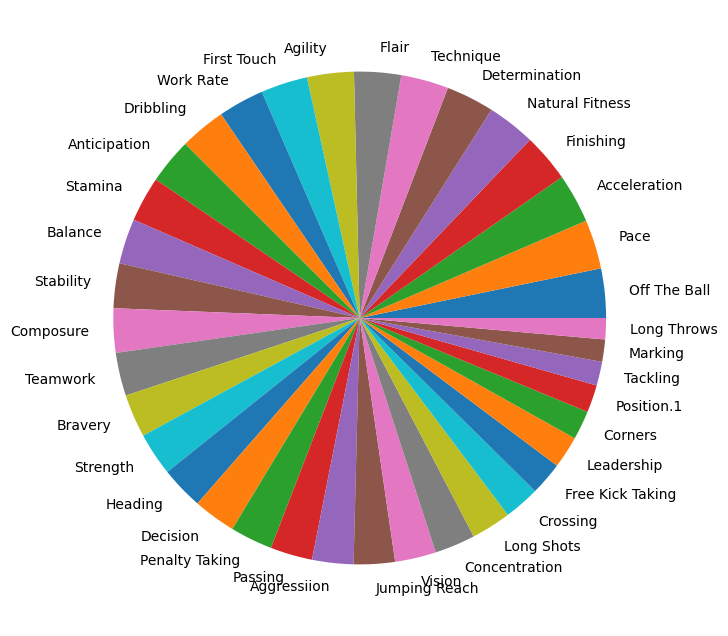

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

att_rank=pd.DataFrame(att_rank)
att_rank.columns = ['Salary']
indexx = att_rank.index
plt.pie(att_rank['Salary'],labels = indexx)
plt.show()

In [ ]:
# 새롭게 DataFrame을 만들기 위해 Salary 칼럼의 nan값 확인결과 극소수의 nan값이 존재함

In [ ]:
att_df[att_df.Salary.isna()]

In [ ]:
mid_df[mid_df.Salary.isna()]

In [ ]:
def_df[def_df.Salary.isna()]

In [ ]:
gk_df[gk_df.Salary.isna()]

In [ ]:
# 소속클럽이 없는 선수들의 주급데이터가 nan임을 확인하고 행제거

att_df = att_df.dropna(subset=['Salary'])
mid_df = mid_df.dropna(subset=['Salary'])
def_df = def_df.dropna(subset=['Salary'])
gk_df = gk_df.dropna(subset=['Salary'])

In [ ]:
# 주급과 능력치의 관계를 분석하기 위하여 새롭게 데이터 정제
# 포지션별로 분리된 자료에서 능력치와 주급을 추출한 데이터프레임 생성

sal_att = att_df.drop(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality',
       'Club', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL',
       'WBR', 'DM', 'ML', 'MC', 'MR', 'AML', 'AMC', 'AMR', 'ST', 'Height',
       'Weight', 'Left Foot', 'Right Foot', 'Values', 'Current reputation',
       'Domestic reputation', 'World reputation', 'Race', 'RCA',
       'Colour of skin', 'Date of birth',
       'Number of national team appearances',
       'Goals scored for the national team', 'Rental club'], axis=1)
sal_mid = mid_df.drop(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality',
       'Club', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL',
       'WBR', 'DM', 'ML', 'MC', 'MR', 'AML', 'AMC', 'AMR', 'ST', 'Height',
       'Weight', 'Left Foot', 'Right Foot', 'Values', 'Current reputation',
       'Domestic reputation', 'World reputation', 'Race', 'RCA',
       'Colour of skin', 'Date of birth',
       'Number of national team appearances',
       'Goals scored for the national team', 'Rental club'],axis=1)
sal_def = def_df.drop(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality',
       'Club', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL',
       'WBR', 'DM', 'ML', 'MC', 'MR', 'AML', 'AMC', 'AMR', 'ST', 'Height',
       'Weight', 'Left Foot', 'Right Foot', 'Values', 'Current reputation',
       'Domestic reputation', 'World reputation', 'Race', 'RCA',
       'Colour of skin', 'Date of birth',
       'Number of national team appearances',
       'Goals scored for the national team', 'Rental club'], axis=1)
sal_gk = gk_df.drop(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality',
       'Club', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Ambition', 'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL',
       'WBR', 'DM', 'ML', 'MC', 'MR', 'AML', 'AMC', 'AMR', 'ST', 'Height',
       'Weight', 'Left Foot', 'Right Foot', 'Values', 'Current reputation',
       'Domestic reputation', 'World reputation', 'Race', 'RCA',
       'Colour of skin', 'Date of birth',
       'Number of national team appearances',
       'Goals scored for the national team', 'Rental club'],axis=1)

<Axes: xlabel='Stability', ylabel='Salary'>

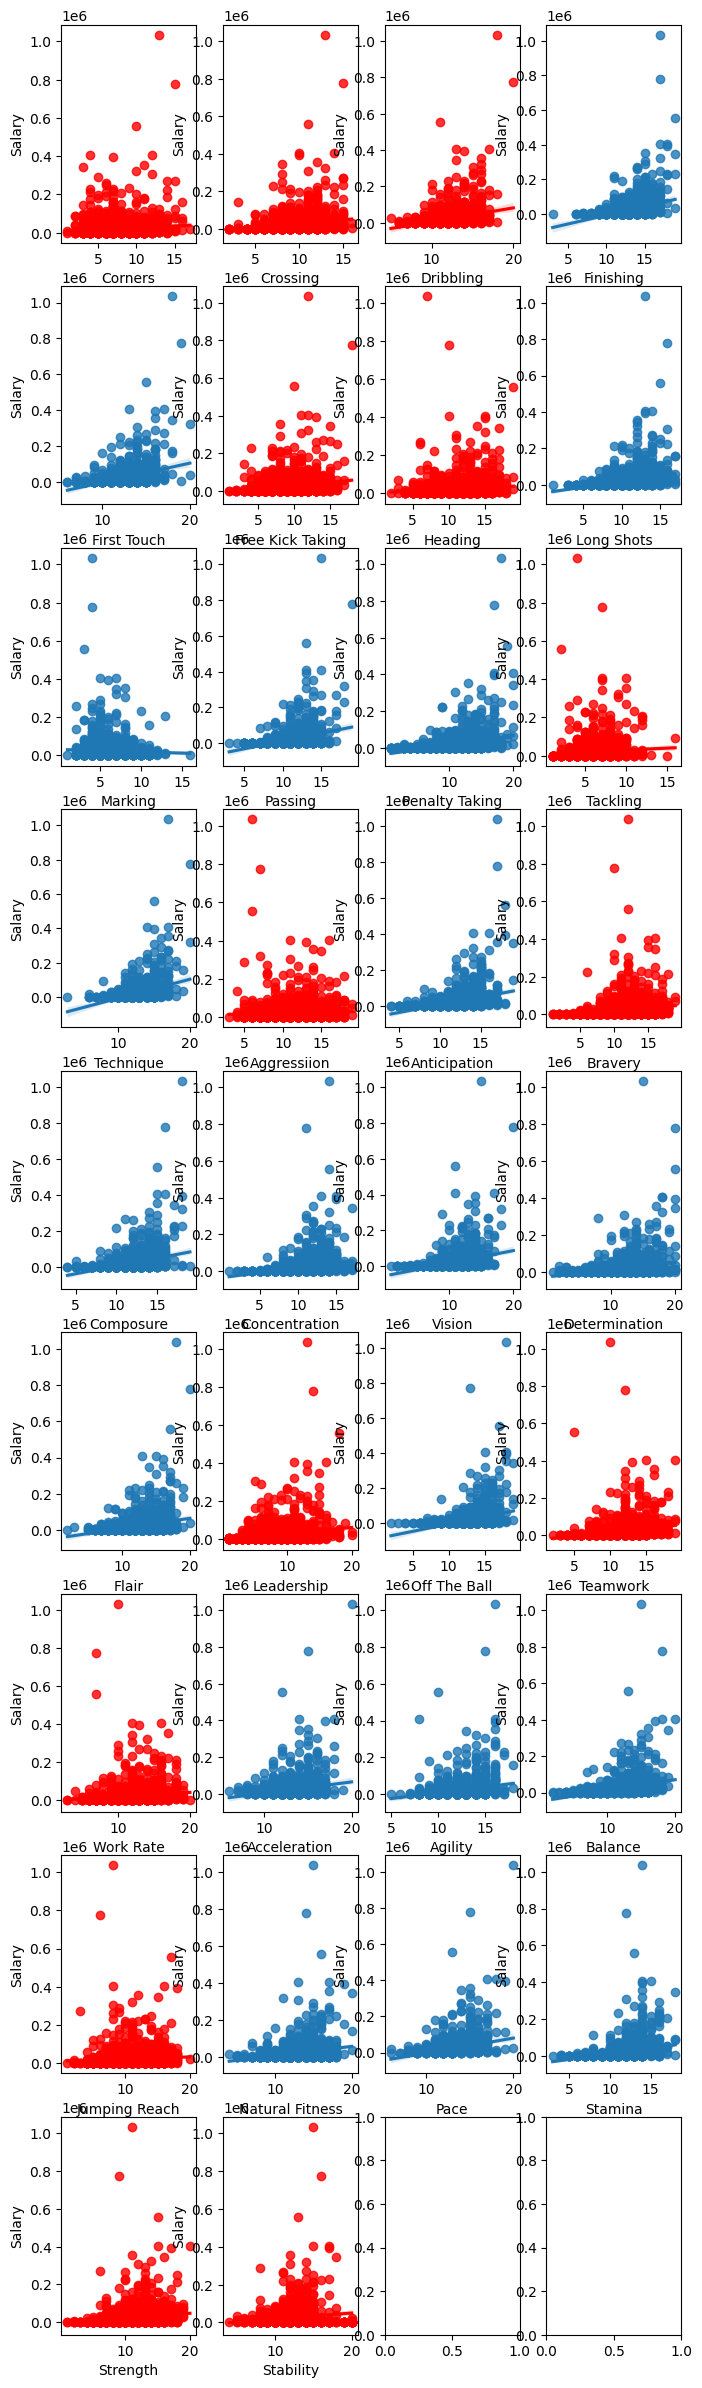

In [ ]:
fig, axes = plt.subplots(9, 4, figsize=(8,30))
sns.regplot(x='Corners',  y='Salary', data=sal_att, color = 'r', ax=axes[0,0])
sns.regplot(x='Crossing', y='Salary', data=sal_att,  color = 'r',ax=axes[0,1])
sns.regplot(x='Dribbling',  y='Salary', data=sal_att, color = 'r', ax=axes[0,2])
sns.regplot(x='Finishing',  y='Salary', data=sal_att, ax=axes[0,3])
sns.regplot(x='First Touch',  y='Salary', data=sal_att, ax=axes[1,0])
sns.regplot(x='Free Kick Taking',  y='Salary', data=sal_att, color = 'r', ax=axes[1,1])
sns.regplot(x='Heading',  y='Salary', data=sal_att, color = 'r', ax=axes[1,2])
sns.regplot(x='Long Shots',  y='Salary', data=sal_att, ax=axes[1,3])
sns.regplot(x='Marking',  y='Salary', data=sal_att, ax=axes[2,0])
sns.regplot(x='Passing',  y='Salary', data=sal_att, ax=axes[2,1])
sns.regplot(x='Penalty Taking',  y='Salary', data=sal_att, ax=axes[2,2])
sns.regplot(x='Tackling',  y='Salary', data=sal_att, color = 'r', ax=axes[2,3])
sns.regplot(x='Technique',  y='Salary', data=sal_att, ax=axes[3,0])
sns.regplot(x='Aggressiion',  y='Salary', data=sal_att, color = 'r', ax=axes[3,1])
sns.regplot(x='Anticipation',  y='Salary', data=sal_att, ax=axes[3,2])
sns.regplot(x='Bravery',  y='Salary', data=sal_att, color = 'r', ax=axes[3,3])
sns.regplot(x='Composure',  y='Salary', data=sal_att, ax=axes[4,0])
sns.regplot(x='Concentration',  y='Salary', data=sal_att, ax=axes[4,1])
sns.regplot(x='Vision',  y='Salary', data=sal_att, ax=axes[4,2])
sns.regplot(x='Determination',  y='Salary', data=sal_att, ax=axes[4,3])
sns.regplot(x='Flair',  y='Salary', data=sal_att, ax=axes[5,0])
sns.regplot(x='Leadership',  y='Salary', data=sal_att, color = 'r', ax=axes[5,1])
sns.regplot(x='Off The Ball',  y='Salary', data=sal_att, ax=axes[5,2])
sns.regplot(x='Teamwork',  y='Salary', data=sal_att, color = 'r', ax=axes[5,3])
sns.regplot(x='Work Rate',  y='Salary', data=sal_att, color = 'r', ax=axes[6,0])
sns.regplot(x='Acceleration',  y='Salary', data=sal_att, ax=axes[6,1])
sns.regplot(x='Agility',  y='Salary', data=sal_att, ax=axes[6,2])
sns.regplot(x='Balance',  y='Salary', data=sal_att, ax=axes[6,3])
sns.regplot(x='Jumping Reach',  y='Salary', data=sal_att, color = 'r', ax=axes[7,0])
sns.regplot(x='Natural Fitness',  y='Salary', data=sal_att, ax=axes[7,1])
sns.regplot(x='Pace',  y='Salary', data=sal_att, ax=axes[7,2])
sns.regplot(x='Stamina',  y='Salary', data=sal_att, ax=axes[7,3])
sns.regplot(x='Strength',  y='Salary', data=sal_att, color = 'r', ax=axes[8,0])
sns.regplot(x='Stability',  y='Salary', data=sal_att, color = 'r', ax=axes[8,1])

In [ ]:
# 상관관계가 보이는(파란색) 요소만 추출해서 새롭게 저장

sal_att = sal_att[['Finishing', 'First Touch', 'Long Shots', 'Marking', 'Passing', 'Penalty Taking', 'Technique',
'Anticipation', 'Composure', 'Concentration', 'Vision', 'Determination', 'Flair', 'Off The Ball',
'Acceleration', 'Agility', 'Balance', 'Natural Fitness', 'Pace', 'Stamina', 'Salary']]

In [ ]:
# LinearRegression을 이용해 공격수의 능력치별 주급 회귀 구현

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# Salary 로그 변환
original_Salary = sal_att['Salary']
sal_att['Salary'] = np.log1p(sal_att['Salary'])

y_target = sal_att['Salary']
X_data = sal_att.drop(['Salary'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 4))

MSE : 1.183 , RMSE : 1.088
Variance score : 0.607
절편 값: -6.550606598197978
회귀 계수값: [ 0.0896  0.0712  0.0448 -0.02    0.074   0.039   0.0417  0.0421  0.0816
  0.0793  0.0472  0.0286  0.0233  0.0542  0.055   0.0133  0.0599  0.0312
  0.208   0.1763]


In [ ]:
# cross val score 활용

from sklearn.model_selection import cross_val_score

y_target = sal_att['Salary']
X_data = sal_att.drop(['Salary'],axis=1,inplace=False)
lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 4))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 4))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse) )

 5 folds 의 개별 Negative MSE scores:  [-0.8534 -0.8776 -1.019  -1.3417 -3.3803]
 5 folds 의 개별 RMSE scores :  [0.9238 0.9368 1.0094 1.1583 1.8386]
 5 folds 의 평균 RMSE : 1.173 


In [ ]:
# 릿지, 라쏘 규제적용
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 4)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = sal_att['Salary']
X_features = sal_att.drop('Salary',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression RMSE: 1.0941
Ridge RMSE: 1.0941
Lasso RMSE: 1.3883


[1.0941050283706892, 1.094096933043023, 1.3882888730102556]

In [ ]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 10,20, 40, 50, 100, 250, 500, 1000] }
lasso_params = { 'alpha':[0.0001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 1.2225, 최적 alpha:{'alpha': 0.05}
Lasso 5 CV 시 최적 평균 RMSE 값: 1.2225, 최적 alpha:{'alpha': 0.0001}


In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression RMSE: 1.0941
Ridge RMSE: 1.0941
Lasso RMSE: 1.0941


[1.0941050283706892, 1.0941046229925062, 1.0941079764714474]

In [ ]:
# XGBoost 학습

from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 1.3873, 최적 alpha:{'n_estimators': 1000}


In [ ]:
# 스태킹 학습

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')

    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환.
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)

# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train,
                                      xgb_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test,
                                     xgb_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
스태킹 회귀 모델의 최종 RMSE 값은: 1.0346893548376894
